In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsimport
from utilities import clean_data

In [31]:
df, df_brands, df_allbrands, brands, compsets, compset_groups, groups_bycompset = clean_data()

In [32]:
df.dropna(axis=0, inplace=True)
df.head()

,period_end_date,business_entity_doing_business_as_name,followers,pictures,videos,comments,likes
20,2017-09-23,24S,19140.0,75.0,10.0,196.0,18853.0
21,2017-09-30,24S,20089.0,65.0,13.0,187.0,17755.0
22,2017-10-07,24S,21007.0,55.0,12.0,144.0,15733.0
23,2017-10-14,24S,22034.0,46.0,13.0,118.0,14802.0
24,2017-10-21,24S,22425.0,46.0,10.0,119.0,14450.0


In [39]:
df.to_csv('../data/cleaned_data.csv', index=False, sep=';')

In [50]:
df = pd.read_csv('../data/cleaned_data.csv', sep=';', header=0, parse_dates=['period_end_date'], index_col='period_end_date')

In [51]:
df["business_entity_doing_business_as_name"].value_counts()

business_entity_doing_business_as_name
Versace            455
C&A Brasil         455
Coach              455
Tarte Cosmetics    455
Armani             455
                  ... 
Sculptra            59
Finding Unicorn     44
Pop Mart            44
Temu                12
ShopGoodwill         7
Name: count, Length: 704, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232172 entries, 2017-09-23 to 2023-09-16
Data columns (total 6 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   business_entity_doing_business_as_name  232172 non-null  object 
 1   followers                               232172 non-null  float64
 2   pictures                                232172 non-null  float64
 3   videos                                  232172 non-null  float64
 4   comments                                232172 non-null  float64
 5   likes                                   232172 non-null  float64
dtypes: float64(5), object(1)
memory usage: 12.4+ MB


In [53]:
# get data for one
df_versace = df[df["business_entity_doing_business_as_name"] == "Versace"]

In [54]:
df_versace.head()

,business_entity_doing_business_as_name,followers,pictures,videos,comments,likes
period_end_date,,,,,,
2015-01-03,Versace,3013544.0,33.0,3.0,7111.0,742976.0
2015-01-10,Versace,3052258.0,28.0,1.0,7193.0,685187.0
2015-01-17,Versace,3091251.0,56.0,0.0,12023.0,1288836.0
2015-01-24,Versace,3124897.0,67.0,0.0,12552.0,1460174.0
2015-01-31,Versace,3179576.0,91.0,0.0,16593.0,2054621.0


### build forecasting model for one brand

In [55]:
df_versace.describe()

,followers,pictures,videos,comments,likes
count,4.550000e+02,455.000000,455.000000,455.000000,4.550000e+02
mean,1.794143e+07,60.683516,8.389011,19088.705495,3.830508e+06
std,8.861745e+06,24.131542,5.801060,13882.181945,2.572646e+06
min,3.013544e+06,18.000000,0.000000,1806.000000,3.359130e+05
25%,9.927106e+06,41.000000,4.000000,9117.500000,1.859912e+06
50%,1.927831e+07,57.000000,7.000000,14751.000000,3.205928e+06
75%,2.557413e+07,79.000000,12.000000,25666.500000,5.452523e+06
max,3.131274e+07,122.000000,29.000000,77862.000000,1.536503e+07


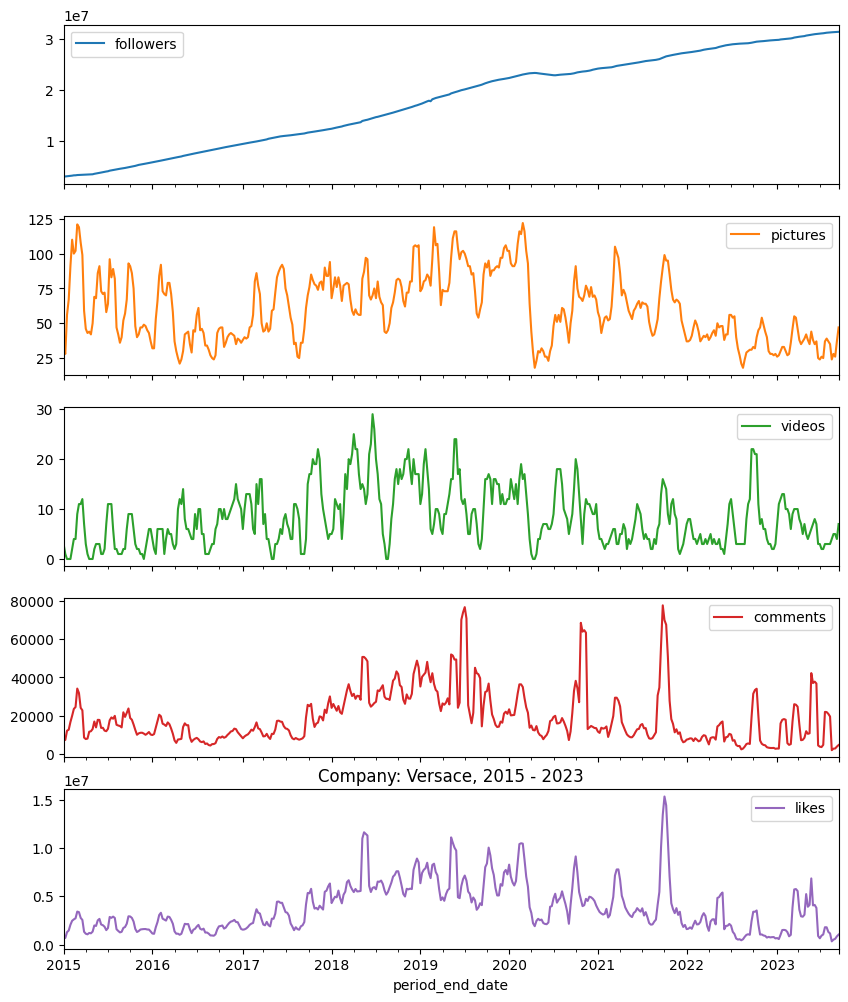

In [57]:
start_year = '2015'
end_year = '2023'
df_versace[start_year:end_year].plot(subplots=True, figsize=(10,12))
plt.title(f'Company: Versace, {start_year} - {end_year}')
plt.show()

### LSTM

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv('../data/cleaned_data.csv', sep=';', header=0, parse_dates=['period_end_date'], index_col='period_end_date')

In [7]:
df_versace = df[df["business_entity_doing_business_as_name"] == "Versace"]
df_versace_followers = df_versace[['followers']]

In [53]:
test_ratio = 0.2
train_size = int(len(df_versace_followers) * (1 - test_ratio))
test_size = len(df_versace_followers) - train_size
train, test = df_versace_followers.iloc[0:train_size], df_versace_followers.iloc[train_size:len(df_versace_followers)]
train.shape, test.shape

((364, 1), (91, 1))

In [5]:
train.head()

,followers
period_end_date,
2015-01-03,3013544.0
2015-01-10,3052258.0
2015-01-17,3091251.0
2015-01-24,3124897.0
2015-01-31,3179576.0


In [54]:

scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test) 


In [7]:
#! pip install keras

In [8]:
#!pip install tensorflow

In [9]:
#!pip install tensorflow-macos

In [10]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [56]:
n_input = 12
n_feature = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=5)


In [57]:
model = Sequential()

model.add(LSTM(128,activation = 'relu', input_shape= (n_input, n_feature), return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 12, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 12, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,857 (1.26 MB)

 Trainable params: 329,857 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.fit(train_generator,epochs=25)

Epoch 1/25


19/71 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3591

/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1658
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0038
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.2189e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2897e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0589e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.3610e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.0783e-04
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.0538e-04
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.9327e-04
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0027
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8883e-04
Epoch 13/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0037
Epoch 14/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 15/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

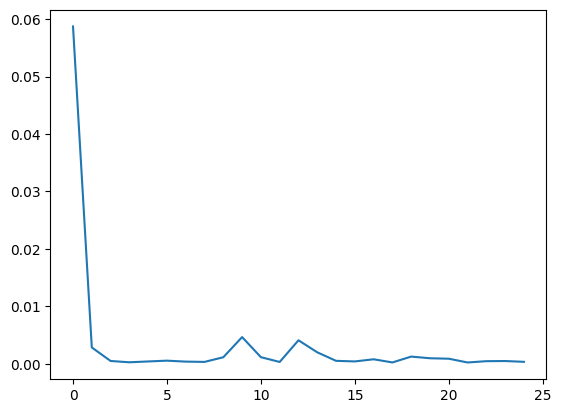

In [60]:
my_loss= model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [61]:
first_eval_batch = scaled_train[-n_input:]
first_eval_batch

array([[0.9688522 ],
       [0.97362026],
       [0.97670584],
       [0.97971268],
       [0.98270978],
       [0.98538887],
       [0.98801319],
       [0.99081939],
       [0.99323393],
       [0.99593708],
       [0.99831694],
       [1.        ]])

In [62]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_feature))
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


array([[1.0104485]], dtype=float32)

In [63]:
#holding my predictions
test_predictions = []
# last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to the format RNN wants (same format as TimeseriesGeneration)
current_batch = first_eval_batch.reshape((1,n_input,n_feature))

#how far into the future will I forecast?

for i in range(len(test)):
    
    # One timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    # UPDATE current batch o include prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/st

In [29]:
test_predictions

[array([0.98752815], dtype=float32),
 array([0.98976713], dtype=float32),
 array([0.99146354], dtype=float32),
 array([0.9927796], dtype=float32),
 array([0.9937969], dtype=float32),
 array([0.9945759], dtype=float32),
 array([0.995149], dtype=float32),
 array([0.99553657], dtype=float32),
 array([0.9957633], dtype=float32),
 array([0.9958815], dtype=float32),
 array([0.99582857], dtype=float32),
 array([0.99569786], dtype=float32),
 array([0.9955626], dtype=float32),
 array([0.99624044], dtype=float32),
 array([0.9967425], dtype=float32),
 array([0.9971256], dtype=float32),
 array([0.99742943], dtype=float32),
 array([0.9976811], dtype=float32),
 array([0.99790066], dtype=float32),
 array([0.99810416], dtype=float32),
 array([0.9983046], dtype=float32),
 array([0.9985112], dtype=float32),
 array([0.9987287], dtype=float32),
 array([0.9989684], dtype=float32),
 array([0.9992308], dtype=float32),
 array([0.9995109], dtype=float32),
 array([0.9997575], dtype=float32),
 array([0.9999849],

In [64]:
true_predictions = scaler.inverse_transform(test_predictions)

In [31]:
true_predictions

array([[26855397.49870044],
       [26909453.31982142],
       [26950409.62705505],
       [26982183.46717727],
       [27006743.43680435],
       [27025551.59307235],
       [27039387.89165819],
       [27048744.48171592],
       [27054218.56178045],
       [27057072.16345447],
       [27055794.30249304],
       [27052638.50397003],
       [27049373.33896834],
       [27065738.01785737],
       [27077858.98956704],
       [27087109.09121132],
       [27094443.84044605],
       [27100519.43614334],
       [27105820.83229417],
       [27110733.68963915],
       [27115573.15632081],
       [27120560.84336174],
       [27125811.87337106],
       [27131599.6625455 ],
       [27137934.28411335],
       [27144696.29836762],
       [27150651.01532531],
       [27156140.9247486 ],
       [27161406.34508407],
       [27166563.83797348],
       [27171698.30634105],
       [27176852.92116523],
       [27182033.43857646],
       [27187234.10244429],
       [27192429.01018167],
       [27197600.893

In [65]:
test['Pred_followers'] =true_predictions

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_27979/391537285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_followers'] =true_predictions


In [66]:
test.head()

,followers,Pred_followers
period_end_date,,
2021-12-25,27208269.0,2.740876e+07
2022-01-01,27252631.0,2.747530e+07
2022-01-08,27290036.0,2.754064e+07
2022-01-15,27323924.0,2.760841e+07
2022-01-22,27374503.0,2.767866e+07


<Axes: xlabel='period_end_date'>

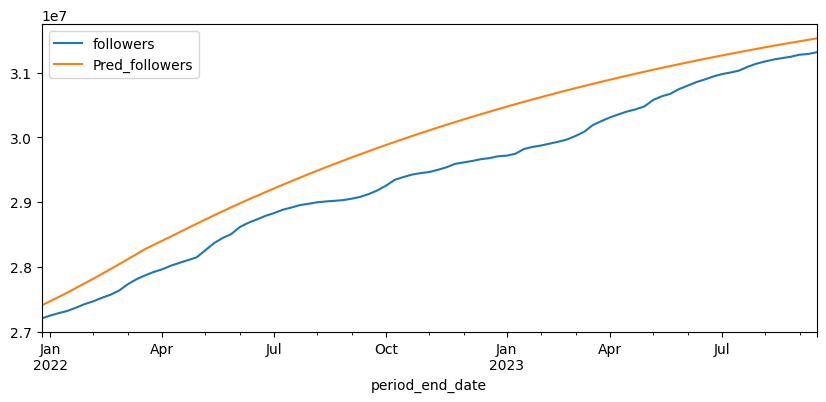

In [68]:
test.plot(figsize=(10,4))

In [23]:
class LSTM_Forecast:
    def __init__(self, df, company_name, target_column, n_input, n_feature, test_ratio, plot = False):
        self.df = df
        self.company_name = company_name
        self.n_input = n_input
        self.n_feature = n_feature
        self.test_ratio = test_ratio
        self.target_column = target_column
        self.company_data = self.get_company_data()
        self.train, self.test = self.train_test_split()
        
        self.scaler = MinMaxScaler()
        self.scaled_train, self.scaled_test = self.scale_data()
        self.train_generator = self.create_generator()
        self.model = self.create_model()
        self.train_model()
        self.test_predictions = self.predict()
        self.true_predictions = self.inverse_transform()
        self.test = self.add_predictions()
        self.mse = self.mean_squared_error()
        self.plot_predictions() if plot else None
        
        
    def get_company_data(self):
        print(f"Load data for {self.company_name}...")
        company_data = self.df[self.df["business_entity_doing_business_as_name"] == self.company_name]
        return company_data[[self.target_column]]
    
    def train_test_split(self):
        print("Splitting data into train and test sets...")
        train_size = int(len(self.company_data) * (1 - self.test_ratio))
        #test_size = len(self.company_data) - train_size
        train, test = self.company_data.iloc[0:train_size], self.company_data.iloc[train_size:len(self.company_data)]
        return train, test
    
    def scale_data(self):
        print("Scaling data...")
        self.scaler.fit(self.train)
        scaled_train = self.scaler.transform(self.train)
        scaled_test = self.scaler.transform(self.test)
        return scaled_train, scaled_test
    
    def create_generator(self):
        print("Creating TimeseriesGenerator...")
        train_generator = TimeseriesGenerator(self.scaled_train, self.scaled_train, length=self.n_input, batch_size=5)
        return train_generator
    
    def create_model(self):
        print(f"Build the model")
        model = Sequential()
        model.add(LSTM(128, activation='relu', input_shape=(self.n_input, self.n_feature), return_sequences=True))
        model.add(LSTM(128, activation='relu', return_sequences=True))
        model.add(LSTM(128, activation='relu', return_sequences=False))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        return model
    
    def train_model(self):
        print(f"Training the model...")
        self.model.fit(self.train_generator, epochs=25)
    
    def predict(self):
        print(f"Predicting...")
        test_predictions = []
        first_eval_batch = self.scaled_train[-self.n_input:]
        first_eval_batch = first_eval_batch.reshape((1, self.n_input, self.n_feature))
        current_batch = first_eval_batch.reshape((1, self.n_input, self.n_feature))
        for i in range(len(self.test)):
            current_pred = self.model.predict(current_batch)[0]
            test_predictions.append(current_pred)
            current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)
        return test_predictions
    
    def inverse_transform(self):
        true_predictions = self.scaler.inverse_transform(self.test_predictions)
        return true_predictions
    
    def add_predictions(self):
        self.test['pred_'+self.target_column] = self.true_predictions
        return self.test
    
    def mean_squared_error(self):
        mse = np.mean((self.test[self.target_column] - self.test['pred_'+self.target_column])**2)
        print(f'Mean Squared Error: {mse}')
        return mse
    
    def plot_predictions(self):
        self.test.plot(figsize=(10,4))
        plt.title(f'{self.company_name} {self.target_column} Forecast')
        plt.show()    
    

Load data for Versace...
Splitting data into train and test sets...
Scaling data...
Creating TimeseriesGenerator...
Build the model
Training the model...


/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
20/71 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0897

/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0523
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0256
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0247
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0389
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0184
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0335
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0191
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0203
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0308
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0131
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0181
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0154
Epoch 13/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0153
Epoch 14/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0093
Epoch 15/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0091
Epoch 16/25
71/7

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_47735/304637765.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test['pred_'+self.target_column] = self.true_predictions


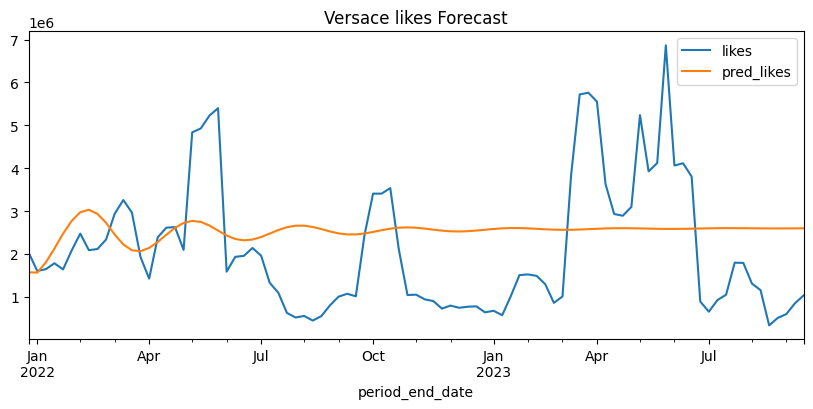

In [24]:
model_likes = LSTM_Forecast(df, 'Versace', 'likes', 12, 1, 0.2, plot=True)

In [25]:
top_brands = df["business_entity_doing_business_as_name"].value_counts().head(5).index
top_brands

Index(['Versace', 'C&A Brasil', 'Coach', 'Tarte Cosmetics', 'Armani'], dtype='object', name='business_entity_doing_business_as_name')

In [26]:
model_list_for_brands = []
for brand in top_brands:
    model = LSTM_Forecast(df, brand, 'followers', 12, 1, 0.2)
    model_list_for_brands.append(model)

Load data for Versace...
Splitting data into train and test sets...
Scaling data...
Creating TimeseriesGenerator...
Build the model
Training the model...
Epoch 1/25


/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/71 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2070

/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1240
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0027
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.8560e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8341e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.4335e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8431e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6139e-04
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0035
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6243e-04
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2825e-04
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.2697e-04
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010
Epoch 13/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0120
Epoch 14/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015
Epoch 15/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_47735/304637765.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test['pred_'+self.target_column] = self.true_predictions
/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/71 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2716

/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1420
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.7358e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2535e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0049
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7844e-04
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5506e-04
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2980e-04
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5045e-04
Epoch 13/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 14/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0104
Epoch 15/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss:

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_47735/304637765.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test['pred_'+self.target_column] = self.true_predictions
/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/71 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1492

/Users/yaoyao/miniconda3/envs/datathon/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0878
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.9717e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.6756e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.4682e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.8015e-04
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0193
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.9065e-04
Epoch 10/25
17/71 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3934e-04

In [ ]:
for model in model_list_for_brands:
    model.plot_predictions()

NameError: name 'model_list_for_brands' is not defined

### Using CrossValidation to choose the best LSTM model